In [ ]:
data = data[['text', 'class']]

In [ ]:
data['class'] = pd.Categorical(data['class'])

<ipython-input-13-f0a1318db573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = pd.Categorical(data['class'])


In [ ]:
data['class'] = data['class'].cat.codes

<ipython-input-15-e0e21d40cc58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].cat.codes


In [ ]:
data

,text,class
0,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",0
1,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",0
2,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",0
3,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""cb...",0
4,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""fa...",0
...,...,...
95,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",1
96,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",0
97,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""pu...",0
98,"{""_index"":""documents"",""_type"":""_doc"",""_id"":""fa...",0


In [ ]:
# # Import data from csv
# data = pd.read_csv('/content/drive/MyDrive/train_all.tsv', sep='\t')

# # Select required columns
# data = data[['text', f'{CLASS_NAME}_stance', f'{CLASS_NAME}_argument']]

# # Set your model output as categorical and save in new label col
# data['stance_label'] = pd.Categorical(data[f'{CLASS_NAME}_stance'])
# data['argument_label'] = pd.Categorical(data[f'{CLASS_NAME}_argument'])

# # Transform your output to numeric
# data[f'{CLASS_NAME}_stance'] = data['stance_label'].cat.codes
# data[f'{CLASS_NAME}_argument'] = data['argument_label'].cat.codes

In [ ]:
# Import data from csv
data_test = pd.read_csv('data_test.csv')

# Select required columns
data_test = data_test[['text', 'class']]

# Set your model output as categorical and save in new label col
data_test['class'] = pd.Categorical(data_test['class'])
# data_test['argument_label'] = pd.Categorical(data_test[f'{CLASS_NAME}_argument'])

# Transform your output to numeric
data_test['class'] = data_test['class'].cat.codes
# data_test[f'{CLASS_NAME}_argument'] = data_test['argument_label'].cat.codes

In [ ]:
class_ = to_categorical(data['class'])

In [ ]:
# y_stance = to_categorical(data[f'{CLASS_NAME}_stance'])
# y_argument = to_categorical(data[f'{CLASS_NAME}_argument'])

In [ ]:
# sentences = data['text']

In [ ]:
# Name of the BERT model to use
model_name = 'DeepPavlov/rubert-base-cased-sentence'

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config=config)

In [ ]:
# tokenizer = Tokenizer(num_words=20500)

In [ ]:
train_x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=256,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)

In [ ]:
train_x['input_ids']

<tf.Tensor: shape=(100, 256), dtype=int32, numpy=
array([[  101,   284,   108, ...,   258, 76428,   102],
       [  101,   284,   108, ..., 17402,   108,   102],
       [  101,   284,   108, ..., 12931, 15900,   102],
       ...,
       [  101,   284,   108, ..., 11756,   132,   102],
       [  101,   284,   108, ..., 12259,   241,   102],
       [  101,   284,   108, ..., 12723, 12259,   102]], dtype=int32)>

In [ ]:
# tokenizer.fit_on_texts(sentences)
# len(test_x)

In [ ]:
# len(tokenizer.word_index)

20017

In [ ]:
# Name of the BERT model to use
model_name = 'DeepPavlov/rubert-base-cased-sentence'

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
# tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config=config)

# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config=config, from_pt=True)
transformer_model.trainable = False
# Load the MainLayer
bert = transformer_model.layers[0]

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(20000, 64, input_length=256)) # 128, 64 to 32 and 20500 to 30000
model_cnn.add(Conv1D(250, 6, padding='valid', activation='softplus')) # 10, 6 to 5
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='softplus'))
model_cnn.add(Dense(3, activation='softmax'))

In [ ]:
optimizer = Adam(
    learning_rate=1e-3, # default value
    epsilon=1e-8, # default value 1e-8
    clipnorm=0.1) # or 0.1, 1.0, etc.

model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# model_cnn.compile(optimizer=Adam(lr=1e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 64)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 251, 250)          96250     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,408,765
Trainable params: 1,408,765
Non-trainable params: 0
____________________________________________

In [ ]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
n_epochs = 100
n_batch_size = 8

In [ ]:
history_cnn_stance = model_cnn.fit(train_x['input_ids'],
                            class_,
                            epochs=n_epochs,
                            batch_size=n_batch_size,
                            validation_split = 0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9778
Epoch 1: val_accuracy did not improve from 0.60000
12/12 [==============================] - 1s 60ms/step - loss: 0.0789 - accuracy: 0.9778 - val_loss: 4.7520 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9556
Epoch 2: val_accuracy did not improve from 0.60000
12/12 [==============================] - 1s 90ms/step - loss: 0.1013 - accuracy: 0.9556 - val_loss: 3.3814 - val_accuracy: 0.6000
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9667
Epoch 3: val_accuracy did not improve from 0.60000
12/12 [==============================] - 1s 48ms/step - loss: 0.0674 - accuracy: 0.9667 - val_loss: 5.2693 - val_accuracy: 0.5000
Epoch 4/100
11/12 [==========================>...] - ETA: 0s - loss: 0.0365 - accuracy: 0.9659
Epoch 4: val_accuracy did not improve from 0.60000
12/12 [===================

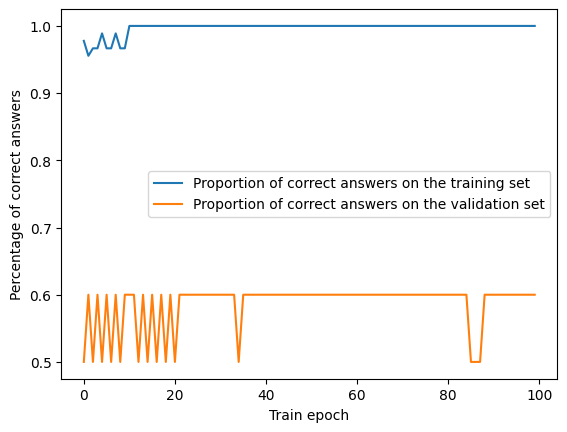

In [ ]:
plt.plot(history_cnn_stance.history['accuracy'],
         label='Proportion of correct answers on the training set')
plt.plot(history_cnn_stance.history['val_accuracy'],
         label='Proportion of correct answers on the validation set')
plt.xlabel('Train epoch')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

In [ ]:
history_cnn_argument = model_cnn.fit(train_x['input_ids'],
                            y_argument,
                            epochs=n_epochs,
                            batch_size=n_batch_size,
                            validation_split = 0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
189/189 [==============================] - ETA: 0s - loss: 0.1759 - accuracy: 0.9519
Epoch 1: val_accuracy improved from 0.45536 to 0.69940, saving model to best_model_cnn.h5
189/189 [==============================] - 6s 34ms/step - loss: 0.1759 - accuracy: 0.9519 - val_loss: 0.9700 - val_accuracy: 0.6994
Epoch 2/5
188/189 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.9757
Epoch 2: val_accuracy improved from 0.69940 to 0.71577, saving model to best_model_cnn.h5
189/189 [==============================] - 6s 33ms/step - loss: 0.0783 - accuracy: 0.9757 - val_loss: 1.9206 - val_accuracy: 0.7158
Epoch 3/5
189/189 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9935
Epoch 3: val_accuracy did not improve from 0.71577
189/189 [==============================] - 5s 24ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 2.3190 - val_accuracy: 0.7024
Epoch 4/5
189/189 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 

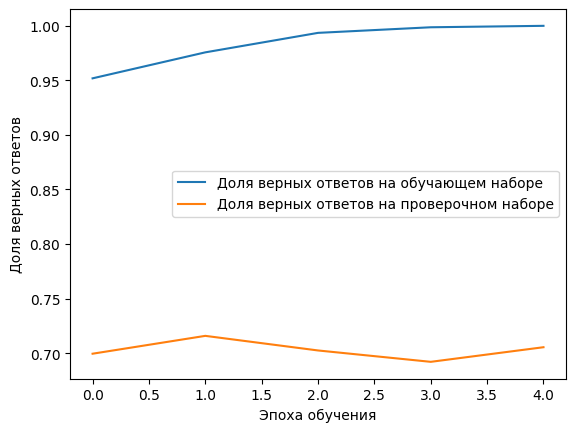

In [ ]:
plt.plot(history_cnn_argument.history['accuracy'],
         label='Proportion of correct answers on the training set')
plt.plot(history_cnn_argument.history['val_accuracy'],
         label='Proportion of correct answers on the validation set')
plt.xlabel('Train epoch')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

In [ ]:
xx_test = tokenizer(
    text=data_test['text'].to_list(),
    add_special_tokens=True,
    max_length=256,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
xx_test

{'input_ids': <tf.Tensor: shape=(96, 256), dtype=int32, numpy=
array([[  101,   284,   108, ...,   130, 11564,   102],
       [  101,   284,   108, ...,   134, 41675,   102],
       [  101,   284,   108, ..., 10723, 24627,   102],
       ...,
       [  101,   284,   108, ...,     0,     0,     0],
       [  101,   284,   108, ..., 13733,   156,   102],
       [  101,   284,   108, ..., 12195, 10213,   102]], dtype=int32)>}

In [ ]:
# test_sequences = tokenizer.texts_to_sequences(data_test['text'])
# x_test = pad_sequences(test_sequences, maxlen=100)

In [ ]:
y_test_stance = utils.to_categorical(data_test['class'], 3)
y_test_stance

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
y_test_argument = utils.to_categorical(data_test[f'{CLASS_NAME}_argument'] - 1, 4)
y_test_argument

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
# model_cnn.load_weights(model_cnn_save_path)

In [ ]:
val_results = model_cnn.predict(xx_test['input_ids'])

3/3 [==============================] - 0s 3ms/step


In [ ]:
model_cnn.evaluate(xx_test['input_ids'], val_results, verbose=1)

3/3 [==============================] - 0s 8ms/step - loss: 0.0515 - accuracy: 1.0000


[0.05145149305462837, 1.0]

In [ ]:
# data_test[f'{CLASS_NAME}_stance_predict'] = val_results.argmax(axis=-1)
data_test['class1'] = val_results.argmax(axis=-1)

In [ ]:
data_test['class'].values

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
data_test['class1'].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])